In [1]:
# 1.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [2]:
# 2.
df = pd.read_csv('/content/classification_dataset.csv')

In [3]:
# 3.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     770 non-null    float64
 1   Sex                     770 non-null    float64
 2   T_Stage                 770 non-null    float64
 3   N_Stage                 770 non-null    float64
 4   6th_Stage               770 non-null    float64
 5   Differentiated          770 non-null    float64
 6   Grade                   770 non-null    float64
 7   A_Stage                 770 non-null    float64
 8   Tumor_Size              770 non-null    float64
 9   Estrogen_Status         770 non-null    float64
 10  Progesterone_Status     770 non-null    float64
 11  Regional_Node_Examined  770 non-null    float64
 12  Reginol_Node_Positive   770 non-null    float64
 13  Mortality_Status        770 non-null    float64
dtypes: float64(14)
memory usage: 84.3 KB
None


In [4]:
# 4.
print(df.describe())

              Age         Sex     T_Stage     N_Stage   6th_Stage  \
count  770.000000  770.000000  770.000000  770.000000  770.000000   
mean    54.568831    0.364935    1.737662    1.284416    2.045455   
std      9.406915    0.481725    0.692715    0.482075    0.908999   
min     30.000000    0.000000    1.000000    1.000000    1.000000   
25%     47.000000    0.000000    1.000000    1.000000    1.000000   
50%     55.000000    0.000000    2.000000    1.000000    2.000000   
75%     63.000000    1.000000    2.000000    2.000000    3.000000   
max     69.000000    1.000000    4.000000    3.000000    5.000000   

       Differentiated       Grade     A_Stage  Tumor_Size  Estrogen_Status  \
count      770.000000  770.000000  770.000000  770.000000       770.000000   
mean         2.802597    2.197403    0.014286   27.011688         0.907792   
std          0.632861    0.632861    0.118743   14.427114         0.289507   
min          1.000000    1.000000    0.000000    2.000000         

In [5]:
print("Variable Scale Types")
scale_types = []
for col in df.columns:
    dtype = df[col].dtype
    if df[col].nunique() <= 10:
        scale_type = "Categorical"
    elif pd.api.types.is_numeric_dtype(df[col]):
        scale_type = "Continuous"
    else:
        scale_type = "Other"
    scale_types.append((col, str(dtype), scale_type))

scale_df = pd.DataFrame(scale_types, columns=['Variable', 'Data Type', 'Scale Type'])
print(scale_df.to_string(index=False))

Variable Scale Types
              Variable Data Type  Scale Type
                   Age   float64  Continuous
                   Sex   float64 Categorical
               T_Stage   float64 Categorical
               N_Stage   float64 Categorical
             6th_Stage   float64 Categorical
        Differentiated   float64 Categorical
                 Grade   float64 Categorical
               A_Stage   float64 Categorical
            Tumor_Size   float64  Continuous
       Estrogen_Status   float64 Categorical
   Progesterone_Status   float64 Categorical
Regional_Node_Examined   float64  Continuous
 Reginol_Node_Positive   float64 Categorical
      Mortality_Status   float64 Categorical


In [6]:
# 5.
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Mortality_Status          0
dtype: int64


In [7]:
#6
# Check original unique values
print("Before cleaning:")
print("Sex values:", df['Sex'].unique())
print("T_Stage:", df['T_Stage'].unique())
print("N_Stage:", df['N_Stage'].unique())
print("6th_Stage:", df['6th_Stage'].unique())
print("Differentiated:", df['Differentiated'].unique())
print("A_Stage:", df['A_Stage'].unique())
print("Estrogen_Status:", df['Estrogen_Status'].unique())
print("Progesterone_Status:", df['Progesterone_Status'].unique())
print("Mortality_Status values:", df['Mortality_Status'].unique())

Before cleaning:
Sex values: [0. 1.]
T_Stage: [1. 2. 3. 4.]
N_Stage: [1. 2. 3.]
6th_Stage: [1. 3. 2. 5. 4.]
Differentiated: [3. 2. 4. 1.]
A_Stage: [0. 1.]
Estrogen_Status: [1. 0.]
Progesterone_Status: [1. 0.]
Mortality_Status values: [1. 0.]


In [8]:
# 7.
# Separate features (X) and target variable (y)
X = df.drop('Mortality_Status', axis=1)  # All columns except Mortality_Status
y = df['Mortality_Status']  # Only the Mortality_Status column

In [9]:
print("Dataset Dimension (Rows, Columns):", df.shape)

Dataset Dimension (Rows, Columns): (770, 14)


In [10]:
(list(df.columns))

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Mortality_Status']

In [11]:
# 8.
# Split data into training (80%) and testing (20%) sets
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Total samples
total_samples = len(y)

# Training and test counts
train_count = len(y_train)
test_count = len(y_test)

# Training and test ratios
train_ratio = train_count / total_samples
test_ratio = test_count / total_samples

# Print results
print(f"Total Samples     : {total_samples}")
print(f"Training Count    : {train_count}")
print(f"Test Count        : {test_count}")
print(f"Training Ratio    : {train_ratio:.2f}")
print(f"Test Ratio        : {test_ratio:.2f}")

Total Samples     : 770
Training Count    : 616
Test Count        : 154
Training Ratio    : 0.80
Test Ratio        : 0.20


In [13]:
# 9.
# Feature Scaling
# Many machine learning algorithms perform better when numerical input variables are scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)

In [14]:
# 10.
# Print the shape of the datasets to confirm successful split
print('Whole DataSet Shape: ' ,df.shape)
print('X_train Shape: ' ,X_train.shape)
print('X_test Shape: ' ,X_test.shape)
print('y_train Shape: ' ,y_train.shape)
print('y_test Shape: ' ,y_test.shape)

Whole DataSet Shape:  (770, 14)
X_train Shape:  (616, 13)
X_test Shape:  (154, 13)
y_train Shape:  (616,)
y_test Shape:  (154,)


Classification Model Building and Evaluation


In [15]:
# Function to evaluate and plot model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, scaled=True):
    """
    Helper function to train, evaluate, and visualize model performance

    Parameters:
    - model: The machine learning model to evaluate
    - X_train, y_train: Training data
    - X_test, y_test: Testing data
    - model_name: Name of the model for display purposes
    - scaled: Whether to use scaled features or not
    """

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)


    # Generate a detailed classification summary
    Report = classification_report(y_test, y_pred, target_names=['Alive', 'Dead'])

    # Construct the confusion matrix (1: Alive, 0: Dead)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Visual representation of the confusion matrix for easier interpretation
    matrix_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Alive', 'Dead'])

    # Plot the confusion matrix with integer formatting
    matrix_disp.plot(values_format='.0f')

    # Add a title to identify the model being evaluated
    plt.title(f'Confusion Matrix for {model_name}')

    # Show the generated confusion matrix plot
    plt.show()

    print()

    # Only attempt to plot ROC if both label classes exist in the target test set
    if len(set(y_test)) > 1:
        # Plot ROC curve to evaluate the model’s ability to distinguish between classes
        RocCurveDisplay.from_estimator(model, X_test, y_test)

        # Label the ROC curve plot for clarity
        plt.title(f'ROC Curve for {model_name}')
        plt.show()
    else:
        # Skip ROC plot if only one class is present, as the curve is undefined
        print(f"Notice: Skipping ROC plot. Only one target class found in y_test for {name}.")


    # Print evaluation metrics
    print(f"\n{model_name} Performance:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(Report)


    return model, accuracy, Report


Building Logistic Regression Model...


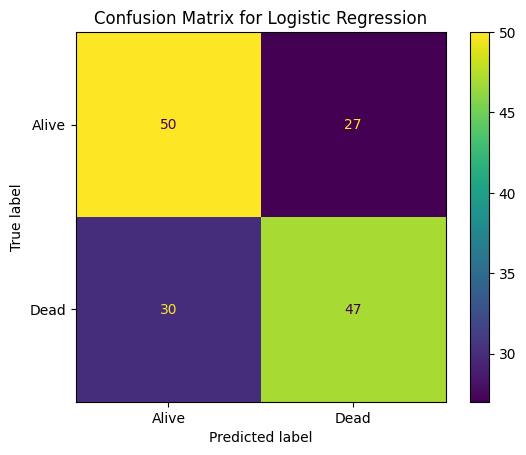

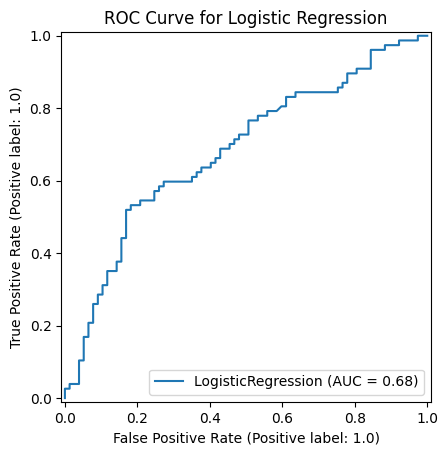


Logistic Regression Performance:
Accuracy: 0.6299

Classification Report:
              precision    recall  f1-score   support

       Alive       0.62      0.65      0.64        77
        Dead       0.64      0.61      0.62        77

    accuracy                           0.63       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.63      0.63      0.63       154



In [16]:
# 1. Logistic Regression
# ----------------------
# Linear model for classification that works well for binary outcomes
# Uses regularization to prevent overfitting
print("\nBuilding Logistic Regression Model...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_model, lr_accuracy, lr_report = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")


Building Decision Tree Model...


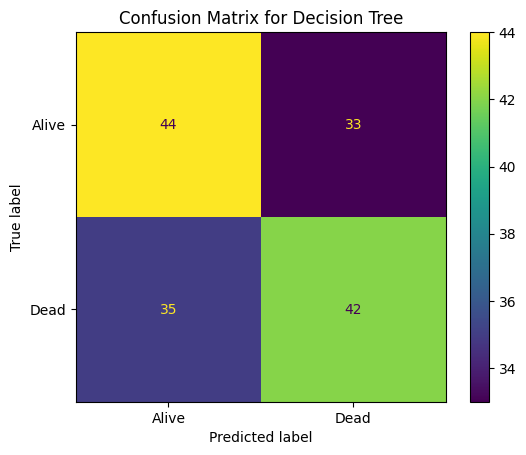

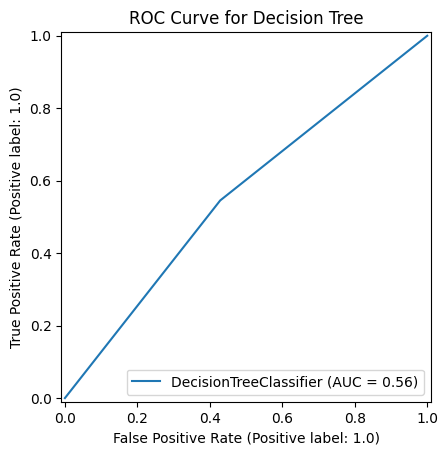


Decision Tree Performance:
Accuracy: 0.5584

Classification Report:
              precision    recall  f1-score   support

       Alive       0.56      0.57      0.56        77
        Dead       0.56      0.55      0.55        77

    accuracy                           0.56       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.56      0.56      0.56       154



In [17]:
# 2. Decision Tree Classifier
# ---------------------------
# Non-linear model that makes decisions based on feature thresholds
# Doesn't require feature scaling
print("\nBuilding Decision Tree Model...")
dt = DecisionTreeClassifier(random_state=42)
dt_model, dt_accuracy, dt_report = evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree", scaled=False)


Building MLP Classifier...


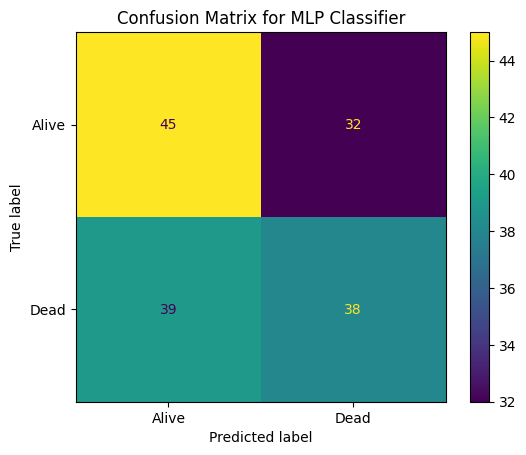

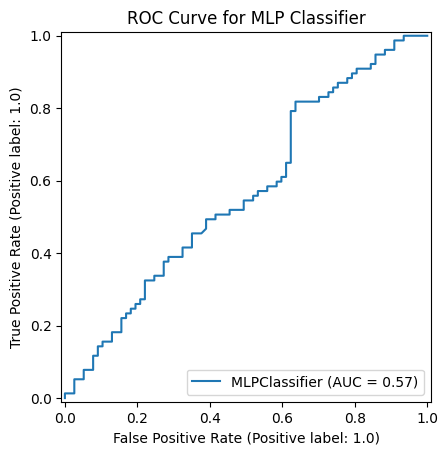


MLP Classifier Performance:
Accuracy: 0.5390

Classification Report:
              precision    recall  f1-score   support

       Alive       0.54      0.58      0.56        77
        Dead       0.54      0.49      0.52        77

    accuracy                           0.54       154
   macro avg       0.54      0.54      0.54       154
weighted avg       0.54      0.54      0.54       154



In [18]:
# 3. Multi-layer Perceptron (Neural Network)
# -----------------------------------------
# Artificial neural network that can learn complex patterns
# Requires feature scaling and often benefits from hyperparameter tuning
print("\nBuilding MLP Classifier...")
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model, mlp_accuracy, mlp_report = evaluate_model(mlp, X_train_scaled, X_test_scaled, y_train, y_test, "MLP Classifier")

In [19]:
# Print a header for the model comparison section
print("\nModel Comparison:")

# Print the accuracy of the Logistic Regression model with 4 decimal places
print(f"Logistic Regression - Accuracy: {lr_accuracy:.4f}")

# Print the accuracy of the Naïve Bayes model with 4 decimal places
print(f"Decesion tree - Accuracy: {dt_accuracy:.4f}")

# Print the accuracy of the K-Nearest Neighbors (KNN) model with 4 decimal places
print(f"neural_network - Accuracy: {mlp_accuracy:.4f}")


Model Comparison:
Logistic Regression - Accuracy: 0.6299
Decesion tree - Accuracy: 0.5584
neural_network - Accuracy: 0.5390


In [20]:
# Dictionary to store macro F1-scores for each model
model_f1_scores = {
    'Logistic Regression': float(lr_report.split()[-4]),   # F1 from macro avg row
    'Decision Tree': float(dt_report.split()[-4]),         # F1 from macro avg row
    'Neural Network': float(mlp_report.split()[-4])        # F1 from macro avg row
}

# Identify the model with the highest F1-score
top_model = max(model_f1_scores, key=lambda model: model_f1_scores[model])

# Display the top-performing model and its F1-score
print(f"\nTop Performing Model: {top_model} (Macro Avg F1 Score: {model_f1_scores[top_model]:.4f})")


Top Performing Model: Logistic Regression (Macro Avg F1 Score: 0.6300)


In [21]:
# Determine which model achieved the highest F1-score and prepare tuning settings accordingly
if top_model == "Logistic Regression":
    # Define search space for Logistic Regression hyperparameters
    tuning_parameters = {
        'C': [0.01, 0.1, 1, 10, 100],                  # Inverse regularization strength
        'solver': ['liblinear', 'lbfgs']               # Optimization algorithms
    }
    # Create an instance of LogisticRegression with a fixed seed
    model_candidate = LogisticRegression(random_state=42)

elif top_model == "Decision Tree":
    # Define parameters to tune for Decision Tree classifier
    tuning_parameters = {
        'max_depth': [3, 5, 10, 15, None],             # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],               # Minimum number of samples to split
        'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples in a leaf
        'criterion': ['gini', 'entropy']               # Splitting strategy
    }
    # Initialize the DecisionTreeClassifier
    model_candidate = DecisionTreeClassifier()

else:  # Assuming the best model is a neural network (MLPClassifier)
    # Define hyperparameter ranges for MLPClassifier tuning
    tuning_parameters = {
        'hidden_layer_sizes': [(100,), (128, 64), (128, 128, 64), (256, 128)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['adaptive'],
        'max_iter': [500, 1000]
    }
    # Instantiate the MLPClassifier with a fixed seed
    model_candidate = MLPClassifier(random_state=42)

In [22]:
grid_search = GridSearchCV(model_candidate, tuning_parameters, cv=3, scoring='f1', n_jobs=-1)

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [24]:
# Extract the top-performing estimator from the grid search results
final_model = grid_search.best_estimator_

# Predict outcomes on the test dataset using the selected model
final_predictions = final_model.predict(X_test)

# Evaluate the prediction accuracy on the test set
final_accuracy = accuracy_score(y_test, final_predictions)

# Create a classification summary including precision, recall, and F1-score
final_classification_report = classification_report(y_test, final_predictions, target_names=['Alive', 'Dead'])

# Build a confusion matrix to visualize prediction results
final_confusion_matrix = confusion_matrix(y_test, final_predictions, labels=[0, 1])

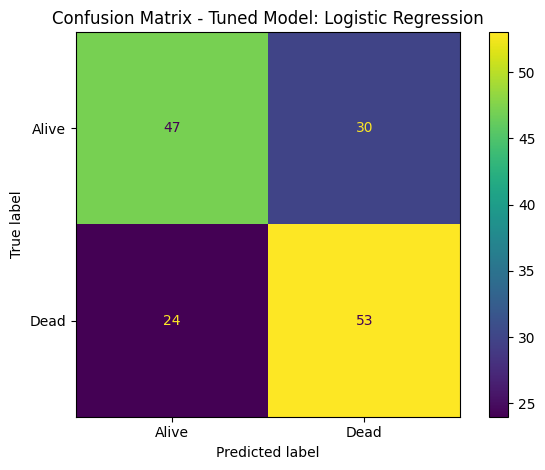

In [25]:
# Visualize the confusion matrix for the top-performing model
from sklearn.metrics import ConfusionMatrixDisplay

# Create the display object with appropriate labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=final_confusion_matrix, display_labels=['Alive', 'Dead'])

# Render the plot with whole number formatting for clarity
cm_display.plot(values_format='d')

# Add a title reflecting that this is the tuned model's confusion matrix
plt.title(f'Confusion Matrix - Tuned Model: {top_model}')

# Show the confusion matrix plot
plt.tight_layout()
plt.show()


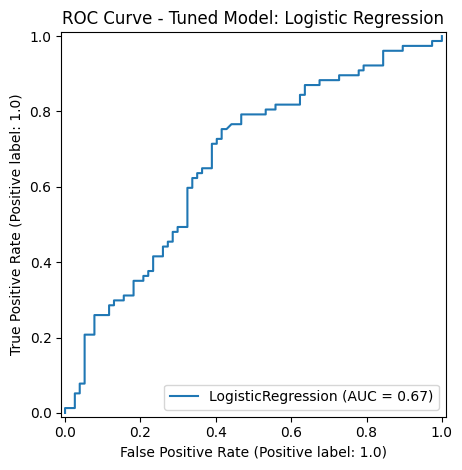

In [26]:
# Ensure the test labels include both classes before plotting ROC curve
unique_classes = set(y_test)
if len(unique_classes) > 1:
    # Generate and display the ROC curve for the selected model
    RocCurveDisplay.from_estimator(final_model, X_test, y_test)

    # Add a descriptive title indicating the model used
    plt.title(f'ROC Curve - Tuned Model: {top_model}')

    # Render the ROC plot
    plt.tight_layout()
    plt.show()
else:
    # Skip plotting if only one class is present in the test set
    print("ROC Curve could not be generated because y_test contains only a single class.")


In [27]:
# Display the evaluation results of the fine-tuned model
print(f"\nPerformance Summary for Tuned Model: {top_model}")

print("="*50)

# Show the optimal set of hyperparameters discovered during tuning
print("Optimal Hyperparameters:", grid_search.best_params_)

# Output the test set accuracy achieved by the tuned model
print(f"Test Set Accuracy: {final_accuracy:.4f}")

# Present the full classification metrics (precision, recall, F1-score, support)
print("Detailed Classification Metrics:\n", final_classification_report)


Performance Summary for Tuned Model: Logistic Regression
Optimal Hyperparameters: {'C': 0.01, 'solver': 'liblinear'}
Test Set Accuracy: 0.6494
Detailed Classification Metrics:
               precision    recall  f1-score   support

       Alive       0.66      0.61      0.64        77
        Dead       0.64      0.69      0.66        77

    accuracy                           0.65       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.65      0.65      0.65       154

